<a href="https://colab.research.google.com/github/Sasidhar003/CV_DL/blob/main/ANN_Pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn

In [ ]:
input_data = torch.randn(3,3)
print(input_data)

tensor([[-0.3257,  0.9469, -1.7473],
        [-1.4775,  0.1104,  0.5234],
        [ 0.4362, -0.4734, -0.4004]])


In [ ]:
class Mymodel(nn.Module):
  def __init__(self):
    super(Mymodel, self).__init__()
    self.linear1 = nn.Linear(49152, 1000)
    self.linear2 = nn.Linear(1000, 10)

  def forward(self,x):
    x1 = self.linear1(x)
    x2 = self.linear2(x1)

    return x2


In [ ]:
model = Mymodel()
input_data = torch.randn(3, 49152)
output_data = model(input_data)
print(output_data)

tensor([[-3.5205e-01,  8.8272e-01, -4.3071e-01,  5.3446e-01, -2.4793e-02,
         -2.7915e-01,  3.0848e-01,  2.5259e-01,  5.0253e-01, -4.4123e-02],
        [-5.9864e-03, -1.8787e-04, -3.7122e-01, -7.0539e-02, -3.1306e-01,
         -1.3005e-01,  1.1463e-01,  2.0979e-01, -6.6420e-02,  1.3003e-01],
        [ 9.5991e-04,  4.6722e-01, -2.1679e-01, -7.4868e-02, -1.5093e-01,
         -3.1215e-01, -5.6950e-02,  1.6064e-01,  5.2890e-01,  5.3644e-03]],
       grad_fn=<AddmmBackward0>)


In [ ]:
import torch
import torch.nn.functional as F
import torchvision.datasets as datasets
import torchvision.transforms as transforms
from torch import optim
from torch import nn
from torch.utils.data import (DataLoader)
from tqdm import tqdm

In [ ]:
class NN(nn.Module):
  def __init__(self, input_size, num_classes):
    super(NN, self).__init__()
    self.fc1 = nn.Linear(input_size, 50)
    self.fc2 = nn.Linear(50, num_classes)

  def forward(self, x):

    x= self.fc1(x)
    x = F.relu(x)
    x = self.fc2(x)

    return x


In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
device


device(type='cuda')

In [ ]:
input_size = 784
num_classes = 10
num_epochs = 9
batch_size = 64
learning_rate = 0.01


In [ ]:
train_dataset = datasets.MNIST(root="dataset/", train = True, transform=transforms.ToTensor(), download = True)
test_dataset = datasets.MNIST(root = "dataset/", train = False, transform = transforms.ToTensor(), download = True)

train_loader = DataLoader(dataset = train_dataset, batch_size=batch_size, shuffle = True)
test_loader = DataLoader(dataset = test_dataset, batch_size=batch_size, shuffle = True)

In [ ]:
model = NN(input_size=input_size, num_classes=num_classes).to(device)

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr = learning_rate)

In [ ]:
#Train Network
for epoch in range(num_epochs):
  for batch_idx, (data, targets) in enumerate(tqdm(train_loader)):
    data = data.to(device = device)
    targets = targets.to(device = device)
    data = data.reshape(data.shape[0], -1)

    scores = model(data)
    loss = criterion(scores, targets)

    optimizer.zero_grad()
    loss.backward()

    optimizer.step()

100%|██████████| 938/938 [00:08<00:00, 116.36it/s]


In [ ]:
def check_accuracy(loader, model):
  num_correct = 0
  num_samples = 0
  model.eval()

  with torch.no_grad():
    for x, y in loader:
      x=x.to(device = device)
      y=y.to(device = device)

      x = x.reshape(x.shape[0], -1)

      scores = model(x)
      _, predictions = scores.max(1)

      num_correct+=(predictions==y).sum()
      num_samples+=predictions.size(0)

  model.train()
  return num_correct/num_samples

print(f"Accuracy on training set:{check_accuracy(train_loader, model)*100:.2f}")
print(f"Accuracy on test set:{check_accuracy(test_loader, model)*100:.2f}")

Accuracy on training set:97.68
Accuracy on test set:96.12


In [ ]:
import cv2
from google.colab.patches import cv2_imshow
test_img = cv2.imread("/content/seve2.png")

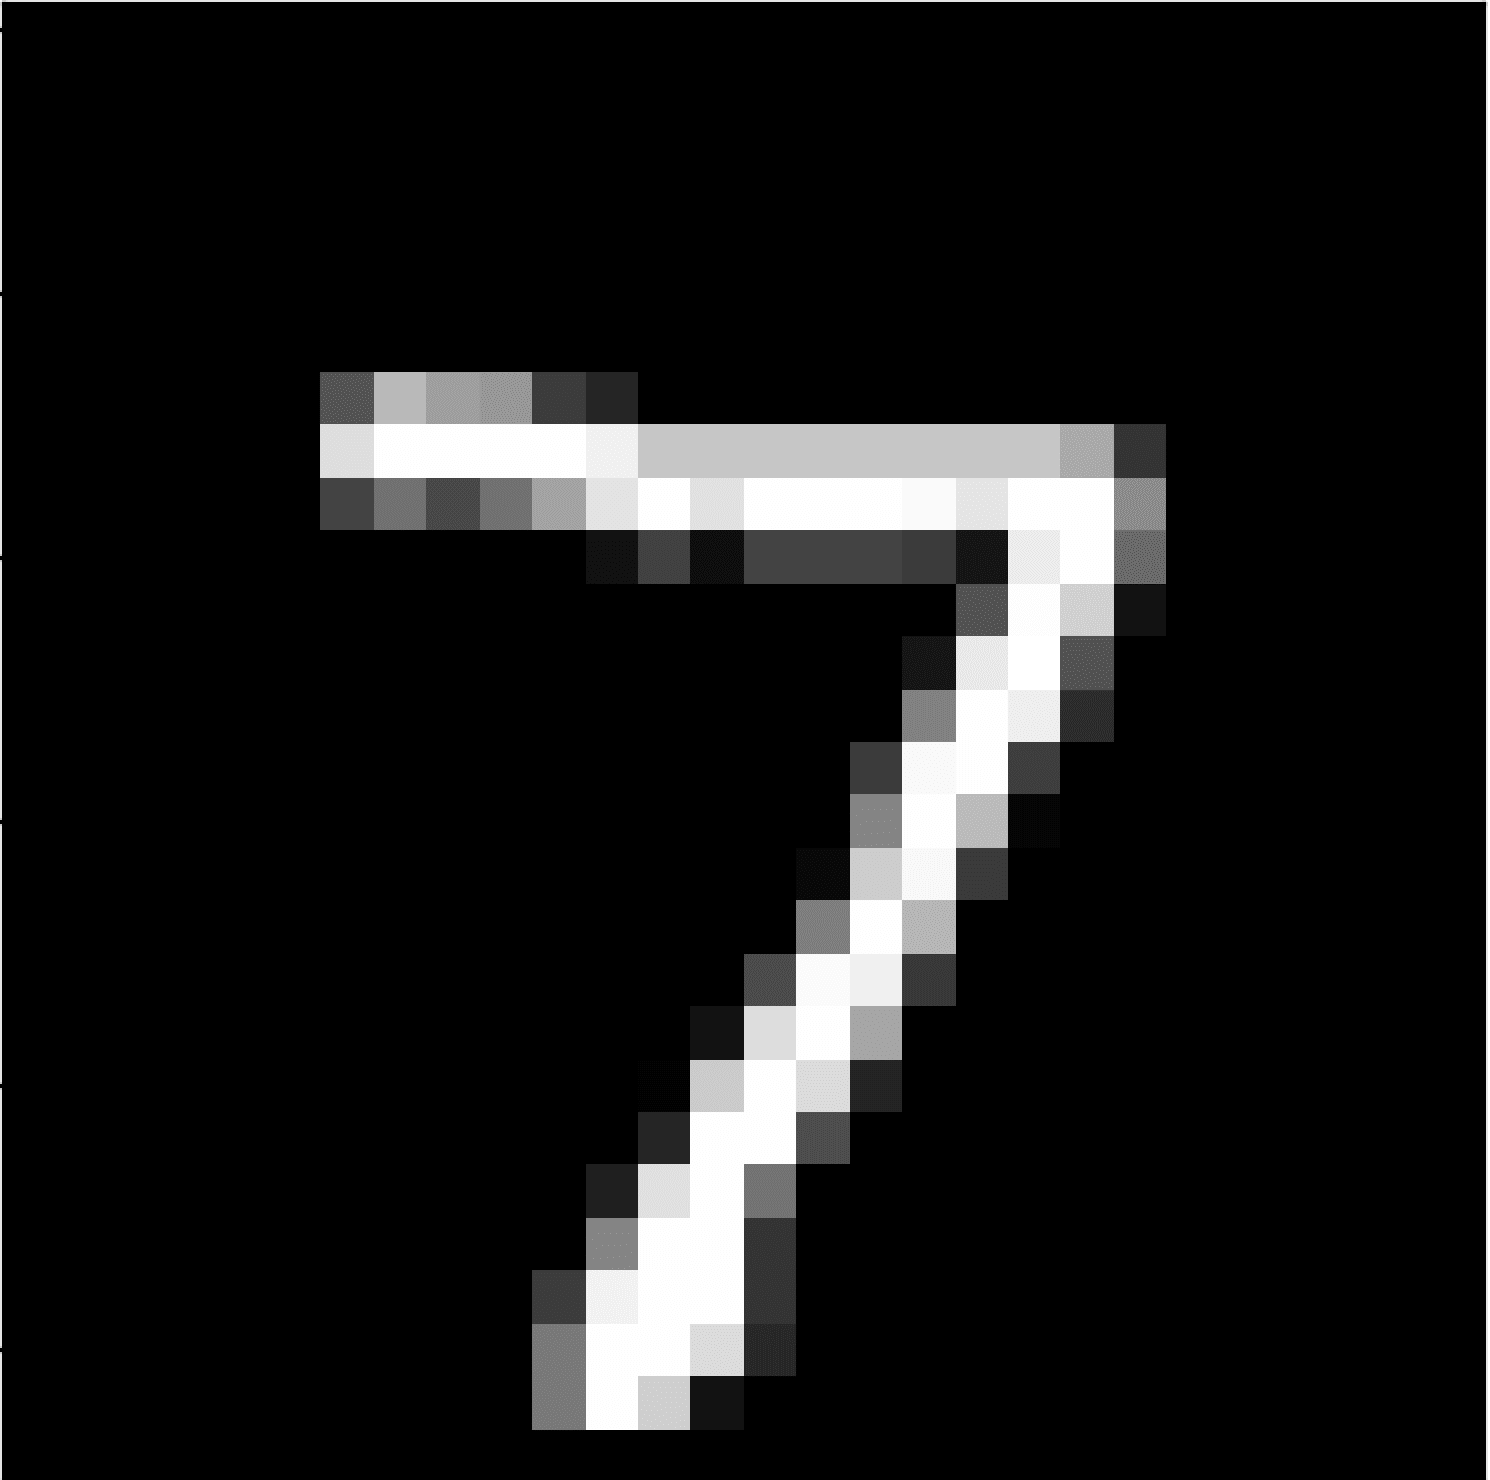

In [ ]:
cv2_imshow(test_img)

In [ ]:
test_img.shape


(1480, 1490, 3)

In [ ]:
test_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2GRAY)
test_img.shape

(1480, 1490)

In [ ]:

resized_img  = cv2.resize(test_img, (28,28))

In [ ]:
cv2_imshow(resized_img)

In [ ]:
img_tensor = torch.Tensor(resized_img)

In [ ]:
img_device = img_tensor.to(device = device)
expanded_tensor  = torch.unsqueeze(img_device, dim = 0)
final_img = expanded_tensor.reshape(expanded_tensor.shape[0], -1)
tensor_float32 = final_img.to(torch.float32)
data = tensor_float32
scores = model(data)
_, predictions = scores.max(1)
print(predictions)

tensor([7], device='cuda:0')
